# The role of bargaining power on household labour market behaviour

Many models of household labour market decisions assume that household members have equal power. This is likely not hold in reality. Our project investigates the effect of imbalances in power levels of household members on labour supply and consumption choices, using a dynamic unitary lifecycle model which we solve and simulate. 
 <br>
 
## Theoretical motivation 
This project is motivated by some topics we have come across in the course 'Household Behavior Over The Lifecycle'. The general framework for our model fits within life-cycle dynamic models of household behaviour, with a bellman equation as follows:


\begin{align*}
V_{t}\left(\mathcal{S}_{t}\right) & =\max _{\mathcal{C}_{t}}\left\{u\left(\mathcal{C}_{t}, \mathcal{S}_{t}\right)+\beta \mathbb{E}_{t}\left[V_{t+1}\left(\mathcal{S}_{t+1}\right)\right]\right\}  \tag{1}\\
\mathcal{S}_{t+1} & \sim \Gamma\left(\mathcal{S}_{t}, \mathcal{C}_{t}\right) \tag{2}
\end{align*}


where $\mathcal{S_t}$ is the set of state variables, $\mathcal{C_t}$ are the set of choice variables and $\beta$ is the discount rate. Examples are Deaton's model or the Buffer-Stock model. Models of this type are used to study (investment) decisions over individuals' life. They are solved using backwards induction (needs a terminal condition).

### How to model power?
To model power dynamics, household utility can be expressed as a weighted sum of household member's utility. Power of member 1 is denoted as $\mu$:

\begin{equation*}
U\left(\mathcal{C}_{t}, \mathcal{S}_{t}, \mu_{t}\right)=\max _{\mathcal{C}_{t}}\left\{\mu_{t} \cdot u_{1}\left(\mathcal{C}_{t}, \mathcal{S}_{t}\right)+\left(1-\mu_{t}\right) \cdot u_{2}\left(\mathcal{C}_{t}, \mathcal{S}_{t}\right)\right\} \tag{3}
\end{equation*}


**Unitary model:** Constant power, $\mu_{t}=\mu \forall t$. e.g. $\mu = 0.5$

**Collective model:** Power determined by exogenous factors, $\mu_{t}=\mu_{t}^{\star}\left(\mathcal{Z}_{t}\right)$.

**Full commitment:** Power determined by endogenous factors at initial period, $\mu_{t}=\mu_{t}^{\star}\left(\mathcal{S}_{0}\right)$

**No commitment:** Power determined by endogenous factors in all periods, $\mu_{t}=\mu_{t}^{\star}\left(\mathcal{S}_{t}\right)$

**Limited commitment:** Power determined by endogenous factors in some periods, $\mu_{t}=\mu_{t}^{\star}\left(\mathcal{S}_{t}, \mu_{t-1}\right)$.


## Our model: 

This project solves and simulates a $T$-period unitary lifecycle model with two-earner couples. For simplicity, couples cannot divorce nor save.

The **Bellman equation** and the recursive formulation of our simple model is 
$$
\begin{align*}
V_{t}(K_{1,t},K_{2,t}) & =\max_{h_{1,t},h_{2,t}}U(c_{t},h_{1,t},h_{2,t})+\beta V_{t+1}(K_{1,t+1},K_{2,t+1})\\
c_{t} & =\sum_{j=1}^{2}w_{j,t}h_{j,t}-T(w_{1,t}h_{1,t},w_{2,t}h_{2,t})\\
\log w_{j,t} & =\alpha_{j,0}+\alpha_{j,1}K_{j,t},\;j\in\{1,2\}\\
K_{j,t+1} & =(1-\delta)K_{j,t}+h_{j,t},\;j\in\{1,2\}
\end{align*}
$$

where couples choose how much to consume, $c_t$, and how much labour to supply, $h_t$. Human capital of each member, $K_{j,t}$, is accumulated from working, which also enters into the wage function, $w_{j,t}$. Each period, human capital depreciates at the rate $\delta$. 
 
**Preferences** are the **weighted** sum of individuals
$$ U(c_{t},h_{1,t},h_{2,t})=\mu(\frac{(c_{t}/2)^{1+\eta}}{1+\eta} -\rho_{1}\frac{h_{1,t}^{1+\gamma}}{1+\gamma})+ (1-\mu)(\frac{(c_{t}/2)^{1+\eta}}{1+\eta} -\rho_{2}\frac{h_{2,t}^{1+\gamma}}{1+\gamma})$$

**Taxes** are on the household level, to model a joint taxation system, such as those in the US and Germany:
$$
T(Y_{1},Y_{2})=(1-\lambda(Y_{1}+Y_{2})^{-\tau})\cdot(Y_{1}+Y_{2})
$$

**Terminal period:** There are no bequests such that
$$
V_{T}(K_{1,T},K_{2,T})  =\max_{h_{1,T},h_{2,T}}U(c_{T},h_{1,T},h_{2,T})
$$

# Analysis
For this analysis, we denote an equal power share $(\mu =0.5 \forall t)$ as the 'baseline' model, and $(\mu =0.3 \forall t)$ as the 'patriarchy' case. The interpretation is that the household members are a husband and wife, where member 1 is the wife and member 2 is the husband. We then investigate how simulated consumption and labour supply behave in the 'baseline' case, compared to the 'patriarchy' case. 

### Setup

In [21]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
# load local model file and initialize model class
from DynHouseholdLaborModel import DynHouseholdLaborModelClass
model = DynHouseholdLaborModelClass()

par = model.par
sol = model.sol
sim = model.sim

In [23]:
model_patriarchy = DynHouseholdLaborModelClass(par={'mu':0.3}) 

## Solving and simulating the two models

In [43]:
# solving the models (using backwards induction)
model.solve()
model_patriarchy.solve()

In [44]:
# simulating the models
model.simulate()
model_patriarchy.simulate()

### Visualising Simulated Behaviour

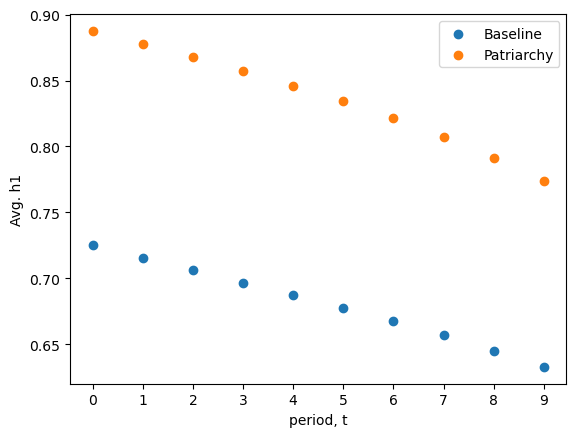

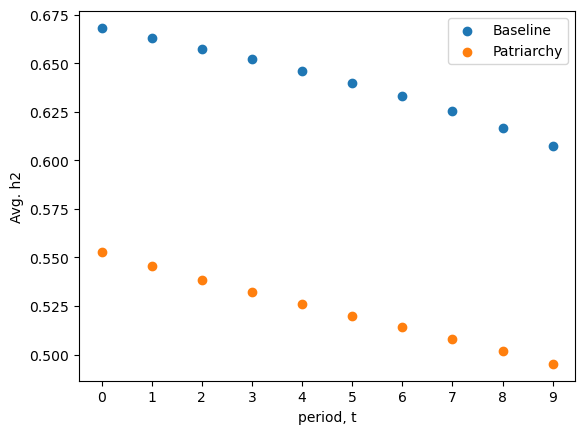

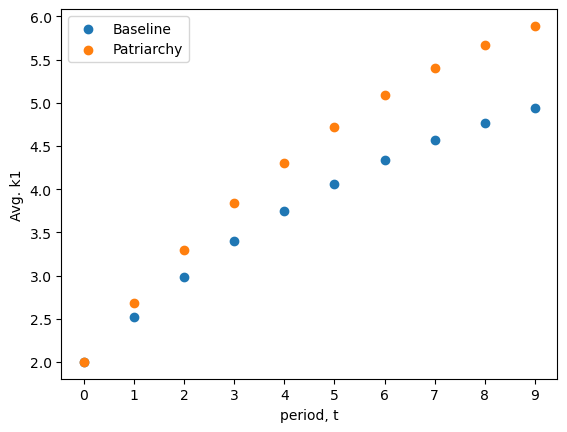

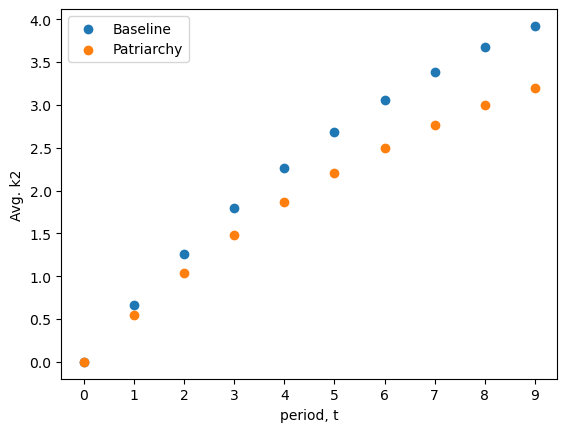

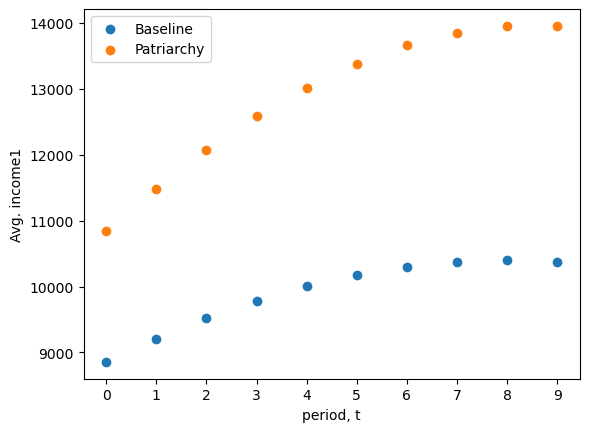

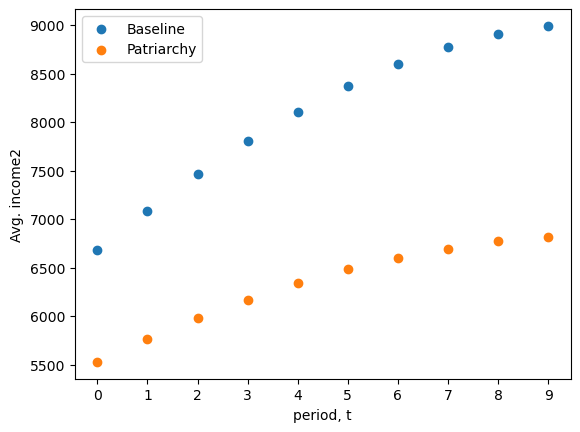

In [48]:
# plot behavior
for var in ('h1','h2','k1','k2','income1','income2'):
    fig, ax = plt.subplots()
    ax.scatter(range(par.simT),np.mean(getattr(model.sim,var),axis=0),label='Baseline')
    ax.scatter(range(par.simT),np.mean(getattr(model_patriarchy.sim,var),axis=0),label='Patriarchy')
    ax.set(xlabel='period, t',ylabel=f'Avg. {var}',xticks=range(par.simT));
    ax.legend();

The above figures of simulated labour market behaviour present our results. As can be seen, in the 'patriarchy' model, female labour supply, human capital accumulation, and wage income are all higher than in the 'baseline', while the opposite is true for men. 